In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# i. Template Matching
### Looks for same 'sub image' sample in an org. image 

In [2]:
full=cv2.imread('D:\projects\PetImages\opencv\peoples.jpg')
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

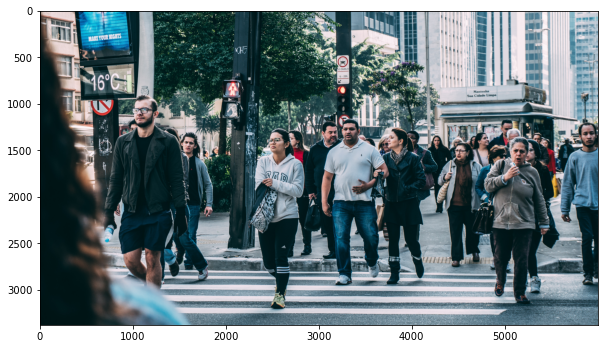

In [3]:
def display(img,cmap=None):
    plt.figure(figsize=(10,8))
    plt.imshow(img,cmap=cmap)
display(full)

In [20]:
full.shape

(3376, 6000, 3)

In [18]:
face1=cv2.imread('D:\projects\PetImages\opencv\peoples2.jpg')
face1=cv2.cvtColor(face1,cv2.COLOR_BGR2RGB)

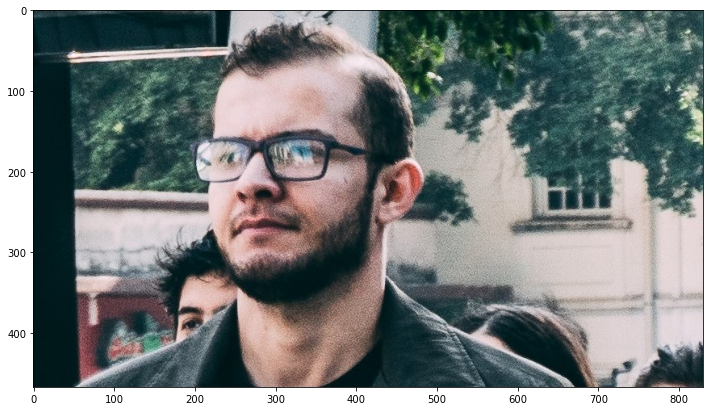

In [19]:
display(face1)

In [21]:
face1.shape

(467, 830, 3)

In [35]:
str_methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED'
        ,'cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

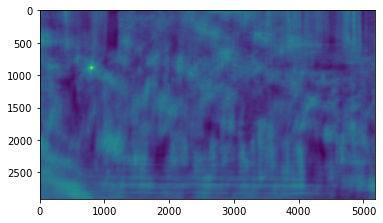

In [27]:
plt.imshow(cv2.matchTemplate(full,face1,method=cv2.TM_CCOEFF_NORMED))
#bright spot resembles the match(high correlations between full image and template)

In [31]:
cv2.minMaxLoc(cv2.matchTemplate(full,face1,method=cv2.TM_CCOEFF))
#returns min\max pixels and "min-correlation [top_left position]" / "max-correlation [top_left position]"
#NOTE
#"cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED"  returns position  in reverse manner 
#                            i.e  -\\-,-\\-,"max-correlation [top_left position]" , "min-correlation [top_left position]"

(-1794846592.0, 5655788032.0, (1882, 2236), (794, 888))

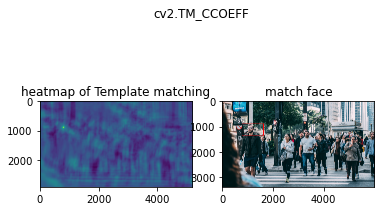

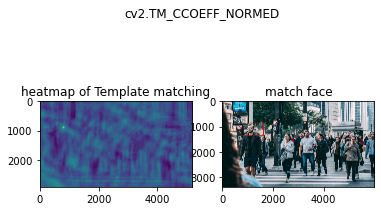

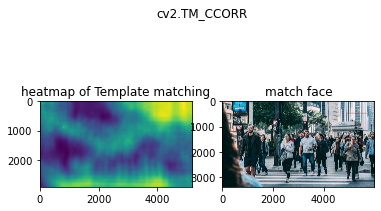

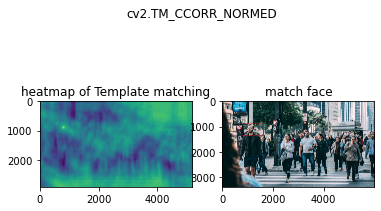

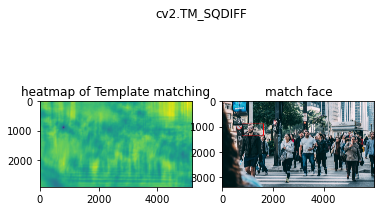

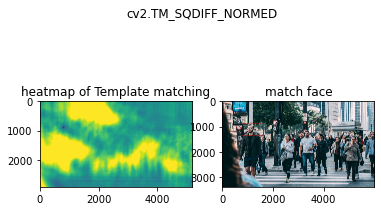

In [49]:
for m in str_methods:
    #creating copy
    full_copy=full.copy()
    method=eval(m)
    
    #Template matching
    result=cv2.matchTemplate(full,face1,method=method)
    min_value,max_value,min_loc,max_loc=cv2.minMaxLoc(result)
    #rectangle ploting
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc  # (x,y)
    else:
        top_left=max_loc
    
    
    height,width,channel=face1.shape
    
    bottom_right=(top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),thickness=12)
    
    #plot
    
    
    
    plt.subplot(121)
    #plt.figure(figsize=(4,4))
    plt.imshow(result)
    plt.title('heatmap of Template matching')
    
    plt.subplot(122)
    #plt.figure(figsize=(4,4))
    plt.imshow(full_copy)
    plt.title('match face')
    # title with methond used
    plt.suptitle(m)
    
    plt.show()
    
    
    
    

# ii. Edge Detection

In [97]:
dog_edge=cv2.imread('C:\\Users\Akhilesh\Downloads\dog12.jpg')
dog_edge=cv2.cvtColor(dog_edge,cv2.COLOR_BGR2RGB)

In [98]:
dog_edge.shape

(2442, 3676, 3)

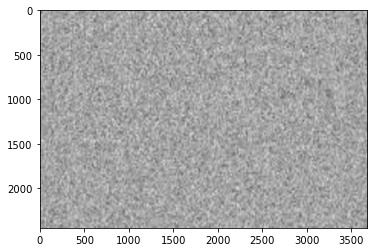

In [82]:
noise=cv2.imread('C:\\Users\\Akhilesh\\Downloads\\noise.jpg')
noise=cv2.resize(noise,(3676,2442))
plt.imshow(noise)

In [83]:
noise.shape

(2442, 3676, 3)

In [99]:
dog_edge=cv2.addWeighted(noise,0.3,dog_edge,0.5,0)

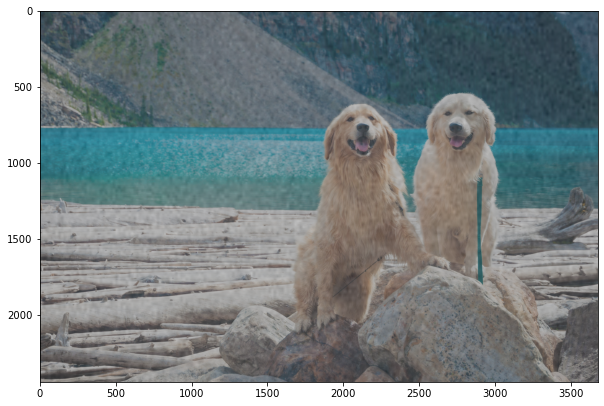

In [100]:
display(dog_edge)

### Random initializing values of threshold1,2

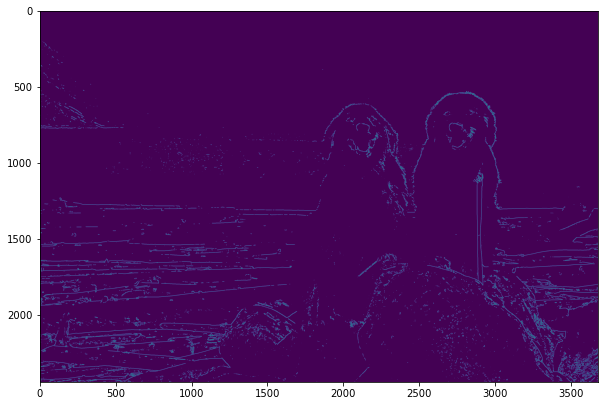

In [101]:
display(cv2.Canny(dog_edge,threshold1=127,threshold2=127))

### Idea to initialize threshold1,2

In [102]:
# lower Threshold to max of 0 and 70% of median value
lower=max(0.7*np.median(dog_edge),0)
#  Higher Threshold to min of  255 and 130% of median value
higher=min(255,1.3*np.median(dog_edge))

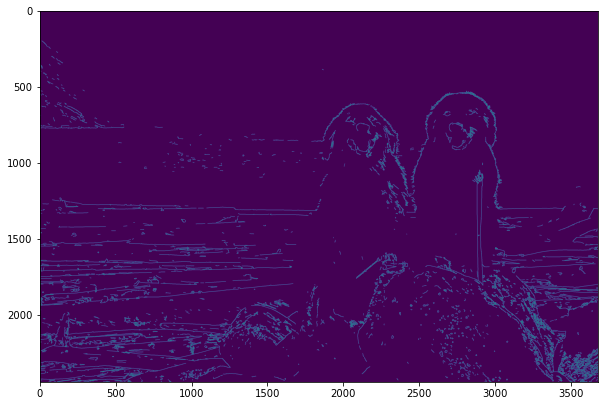

In [103]:
display(cv2.Canny(dog_edge,threshold1=lower,threshold2=higher))

### To apply Canny edge detection algo. we need to blur/smooter imge for better performance

In [114]:
dog_blur=cv2.blur(dog_edge,ksize=(3,3))

In [116]:
lower,higher

(79.1, 146.9)

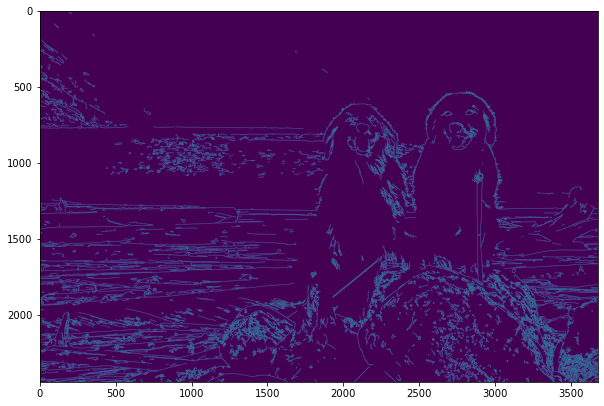

In [121]:
display(cv2.Canny(dog_blur,threshold1=lower*0,threshold2=higher-50))

# iii. Corner Detection

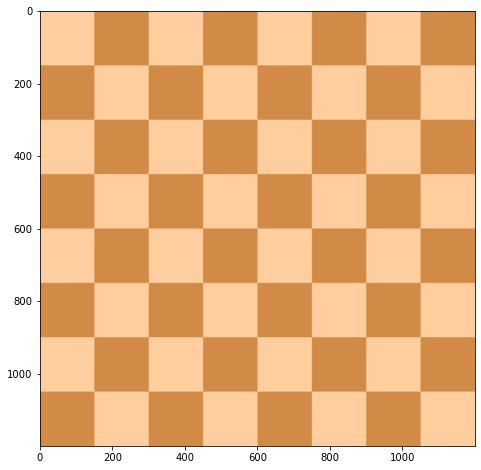

In [43]:
flat_chess=cv2.imread('C:\\Users\\Akhilesh\\Downloads\\flatchess.png')
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
display(flat_chess,'gray')

In [32]:
flat_chess.shape

(1200, 1200, 3)

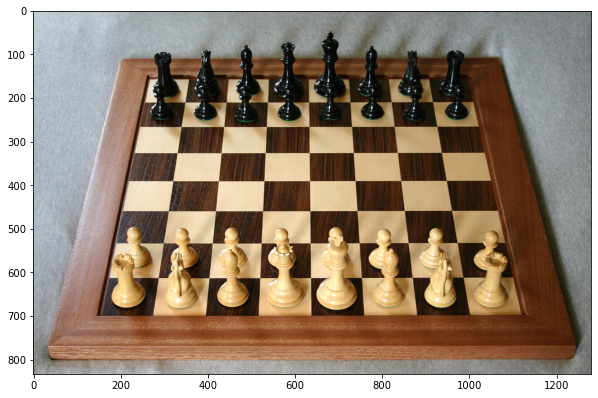

In [75]:
real_chess=cv2.imread('C:\\Users\\Akhilesh\\Downloads\\chess1.jpg')
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
display(real_chess)

### 1. Harris Corner Detection Algo

In [34]:
flat_chess=np.float32(flat_chess)
real_chess=np.float32(real_chess)
gray_flat_chess=np.float32(gray_flat_chess)
fray_real_chess=np.float32(gray_real_chess)

In [35]:
#parameters

#scr :- Input image, it should be grayscale and float32 type.
#blockSize :- It is the size of neighbourhood considered for corner detection
#ksize :- Aperture parameter of Sobel derivative used.
#k :- Harris detector free parameter in the equation.

In [56]:
dst=cv2.cornerHarris(src=gray_flat_chess,blockSize=2,ksize=3,k=0.04)

In [37]:
dst.shape,flat_chess.shape,gray_flat_chess.shape

((1200, 1200), (1200, 1200, 3), (1200, 1200))

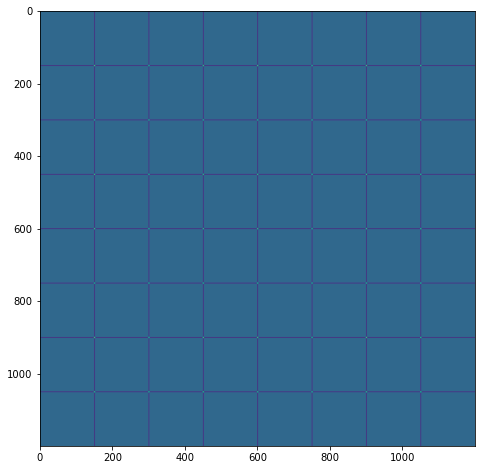

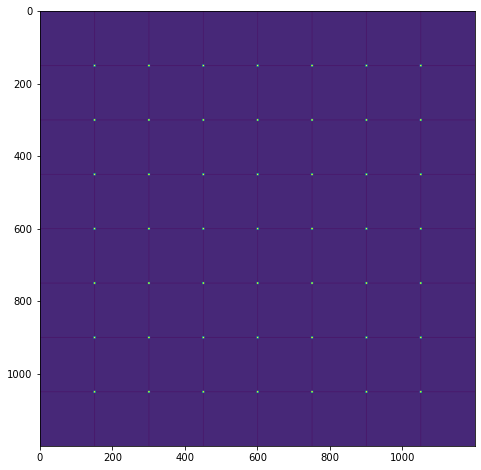

In [38]:
display(dst)
dst=cv2.dilate(dst,None)
display(dst)

In [65]:
d=flat_chess.copy()

In [66]:
d[dst>0.005*dst.max()]=(255,0,0)

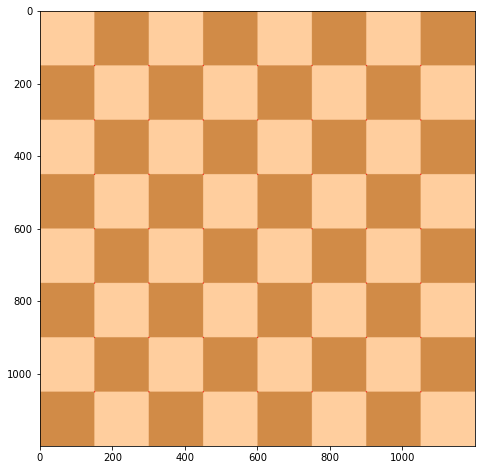

In [67]:
display(d)

In [71]:
dst=cv2.cornerHarris(src=gray_real_chess,blockSize=4,ksize=7,k=0.04)

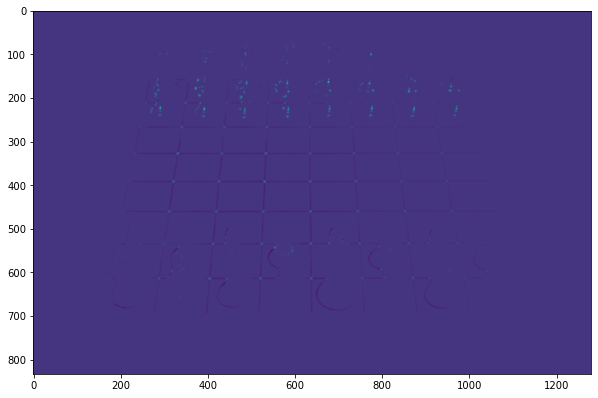

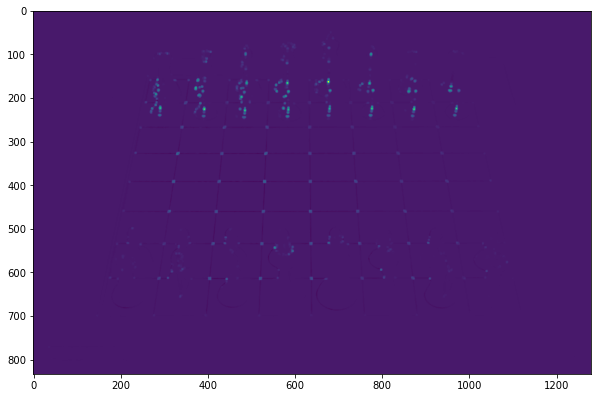

In [72]:
display(dst)
dst=cv2.dilate(dst,None)
display(dst)

In [76]:
real_chess[dst>0.04*dst.max()]=[255,0,0]

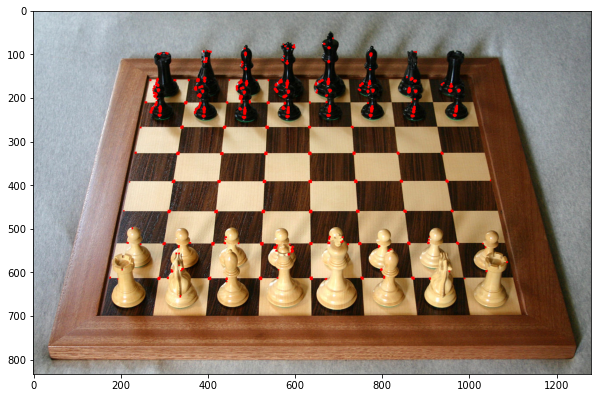

In [77]:
display(real_chess)

# 2. shi tomasi corner detection algo

## no. of corners is in user's Wish

In [135]:
flat_chess=cv2.imread('C:\\Users\\Akhilesh\\Downloads\\flatchess.png')
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)



real_house=cv2.imread('C:\\Users\\Akhilesh\\Downloads\\house01.jpg')
real_house=cv2.cvtColor(real_house,cv2.COLOR_BGR2RGB)
gray_real_house=cv2.cvtColor(real_house,cv2.COLOR_BGR2GRAY)

In [114]:
# parameter
#image – Input 8-bit or floating-point 32-bit, single-channel image.
#eig_image – The parameter is ignored.
#temp_image – The parameter is ignored.
#corners – Output vector of detected corners.
#maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
               #  suppose no. of user inp. corner > actuall/dectected cornser the ,returns max corners it detects
#qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see cornerMinEigenVal() ) or the Harris function response (see cornerHarris() ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.
#minDistance – Minimum possible Euclidean distance between the returned corners.
#mask – Optional region of interest. If the image is not empty (it needs to have the type CV_8UC1 and the same size as image ), it specifies the region in which the corners are detected.
#blockSize – Size of an average block for computing a derivative covariation matrix over each pixel neighborhood. See cornerEigenValsAndVecs() .
#useHarrisDetector – Parameter indicating whether to use a Harris detector (see cornerHarris()) or cornerMinEigenVal().
#k – Free parameter of the Harris detector.

In [123]:
corners=cv2.goodFeaturesToTrack(gray_flat_chess,maxCorners=64,qualityLevel=0.01,minDistance=10)

In [124]:
corners.shape

(49, 1, 2)

In [125]:
j=0
for i in corners:
    x,y=i.ravel()
    cv2.circle(flat_chess,(x,y),9,(255,0,0),-1)
    print(i.ravel())
    j+=1
j    

[1050. 1050.]
[ 900. 1050.]
[ 750. 1050.]
[ 600. 1050.]
[ 450. 1050.]
[ 300. 1050.]
[ 150. 1050.]
[1050.  900.]
[900. 900.]
[750. 900.]
[600. 900.]
[450. 900.]
[300. 900.]
[150. 900.]
[1050.  750.]
[900. 750.]
[750. 750.]
[600. 750.]
[450. 750.]
[300. 750.]
[150. 750.]
[1050.  600.]
[900. 600.]
[750. 600.]
[600. 600.]
[450. 600.]
[300. 600.]
[150. 600.]
[1050.  450.]
[900. 450.]
[750. 450.]
[600. 450.]
[450. 450.]
[300. 450.]
[150. 450.]
[1050.  300.]
[900. 300.]
[750. 300.]
[600. 300.]
[450. 300.]
[300. 300.]
[150. 300.]
[1050.  150.]
[900. 150.]
[750. 150.]
[600. 150.]
[450. 150.]
[300. 150.]
[150. 150.]


49

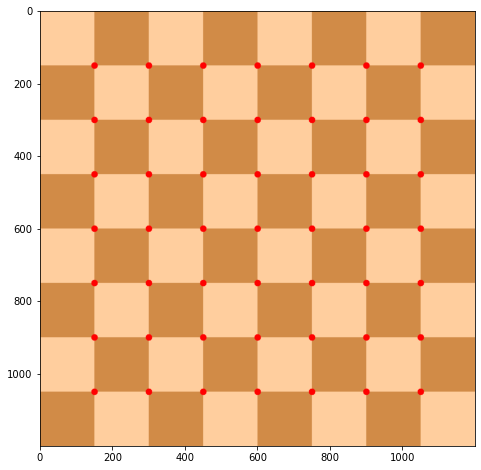

In [126]:
display(flat_chess)

In [138]:
corners=cv2.goodFeaturesToTrack(gray_real_house,maxCorners=1000,qualityLevel=0.01,minDistance=10)

[607. 291.]
[688. 328.]
[700. 328.]
[995. 211.]
[607. 313.]
[689. 416.]
[980. 234.]
[688. 350.]
[700. 402.]
[980. 292.]
[969. 266.]
[452. 313.]
[930. 333.]
[452. 291.]
[992. 250.]
[983. 255.]
[505. 415.]
[771. 363.]
[918. 352.]
[ 14. 283.]
[959. 291.]
[973. 256.]
[452. 411.]
[982. 206.]
[885. 274.]
[535. 415.]
[915. 321.]
[937. 194.]
[933. 208.]
[919. 221.]
[700. 355.]
[738. 131.]
[666. 278.]
[677. 328.]
[939. 343.]
[985. 276.]
[688. 396.]
[969. 304.]
[955. 327.]
[970. 210.]
[724. 359.]
[960. 196.]
[935. 218.]
[297. 213.]
[721. 419.]
[ 78. 417.]
[662. 212.]
[959. 224.]
[ 75. 359.]
[128. 356.]
[712. 352.]
[771. 329.]
[243. 348.]
[421. 160.]
[  3. 278.]
[909. 337.]
[945. 332.]
[910. 359.]
[988. 352.]
[490. 160.]
[941. 289.]
[243. 406.]
[89. 92.]
[992. 224.]
[676. 342.]
[949. 295.]
[712. 329.]
[993. 265.]
[837. 327.]
[664. 201.]
[909. 347.]
[688. 451.]
[956. 206.]
[562. 160.]
[475. 413.]
[982. 372.]
[284. 273.]
[873. 277.]
[275. 215.]
[674. 189.]
[230. 342.]
[920. 202.]
[754. 416.]
[ 14. 

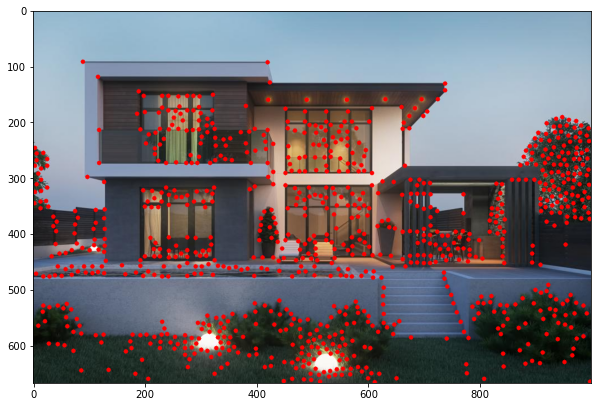

In [139]:
j=0
for i in corners:
    x,y=i.ravel()
    cv2.circle(real_house,(x,y),4,(255,0,0),-1)
    print(i.ravel())
    j+=1
j    

display(real_house)